In [22]:
from document_classification.document_classifier import DocumentClassifier
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from utils.gaussian import get_classes_thresholds

In [2]:
dc = DocumentClassifier("AlexNet")
dc.split_train_val_test()
dc.labels_df.to_csv("labels2.csv")
dc.load_trained_classifier(
    "/data/dssg/occrp/data/output/document_classifier/AlexNet_2022_08_10-13_16_52/epoch99", "labels2.csv"
)

2022-08-10 16:33:59.268836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:33:59.270184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:33:59.279807: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/cordero/.local/share/virtualenvs/dssgxdfki2022-occrp-kILcxiHt/lib64/python3.8/site-packages/cv2/../../lib64:
2022-08-10 16:33:59.279840: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you w

In [4]:
dc.create_image_generators()
dc.save_train_dataset_outputs()

Found 575 validated image filenames belonging to 9 classes.
Found 81 validated image filenames belonging to 9 classes.
Found 163 validated image filenames belonging to 9 classes.
Found 575 validated image filenames belonging to 9 classes.
23/23 [==============================] - 3s 110ms/step


In [5]:
dc.model_id

'AlexNet_2022_08_10-16_33_59'

In [6]:
csv_path = "/data/dssg/occrp/data/output/document_classifier/AlexNet_2022_08_10-16_33_59/assessment/train_predictions.csv"
df = pd.read_csv(csv_path)

In [17]:
df["max-pred"] = df[df.columns[:-1]].idxmax(axis=1)

In [18]:
accuracy_score(df["true-label"], df["max-pred"])

0.9773913043478261

In [24]:
train_prediction_dict = {}
for col in df.columns[:-2]:
    train_prediction_dict[col] = df[df["true-label"] == col][col]
# train_prediction_dict = train_prediction_df[self.text_labels].to_dict(orient="list")
class_thresholds = get_classes_thresholds(train_prediction_dict)
class_thresholds

{'bank-statements': 0.8758990613423907,
 'company-registry': 0.8367792708461851,
 'contracts': 0.7711993110706453,
 'court-documents': 0.7792700337841716,
 'gazettes': 0.9984530155031546,
 'invoices': 0.8127259066765643,
 'passport-scan': 0.8743578850274689,
 'receipts': 0.8449660431258748,
 'shipping-receipts': 0.9072243525765838}

In [25]:
class_thresholds2 = get_classes_thresholds(train_prediction_dict, scale=1.98)
class_thresholds2

{'bank-statements': 0.7542801414579337,
 'company-registry': 0.6768229562754464,
 'contracts': 0.5469746359198777,
 'court-documents': 0.5629546668926598,
 'gazettes': 0.9969369706962461,
 'invoices': 0.6291972952195973,
 'passport-scan': 0.7512286123543885,
 'receipts': 0.693032765389232,
 'shipping-receipts': 0.816304218101636}

In [ ]:
class_thresholds3 = get_classes_thresholds(train_prediction_dict)
class_thresholds3

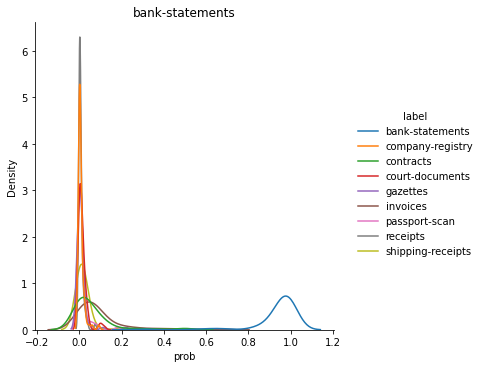

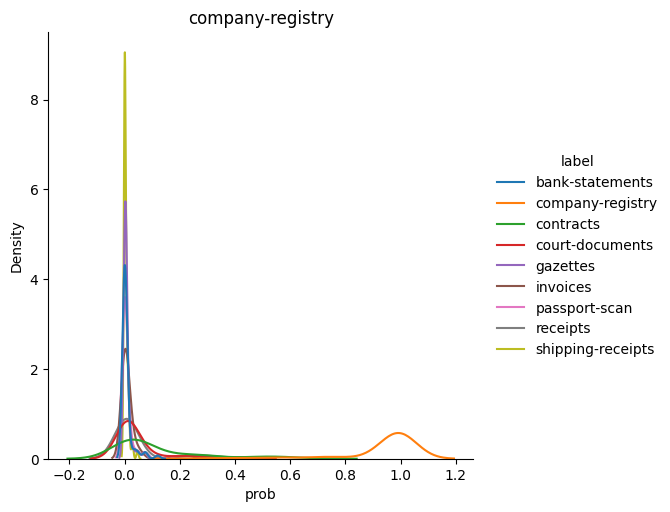

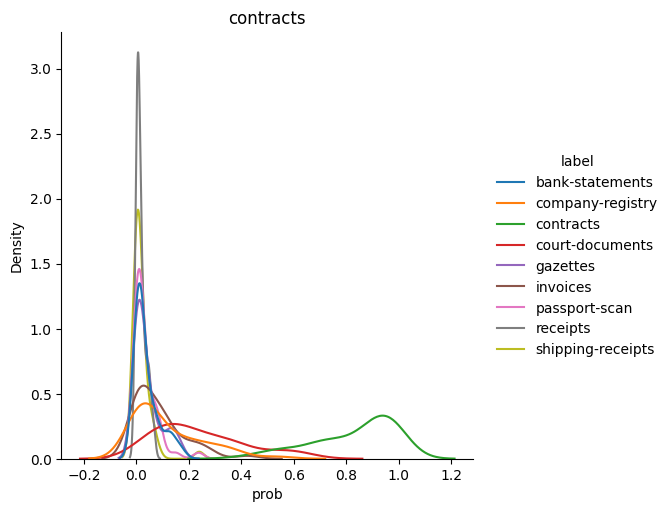

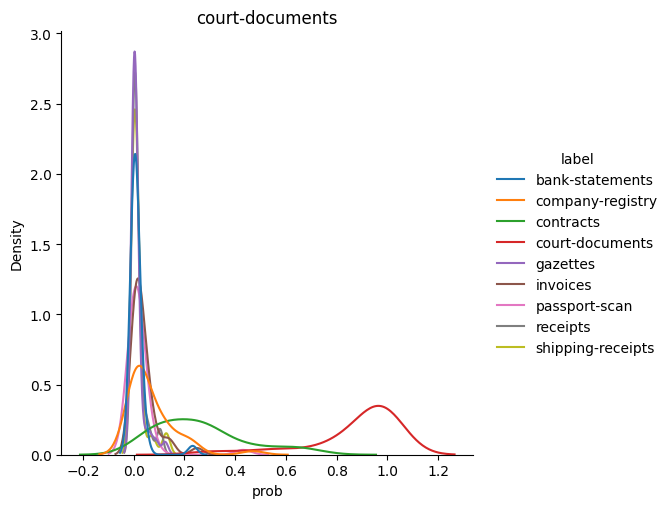

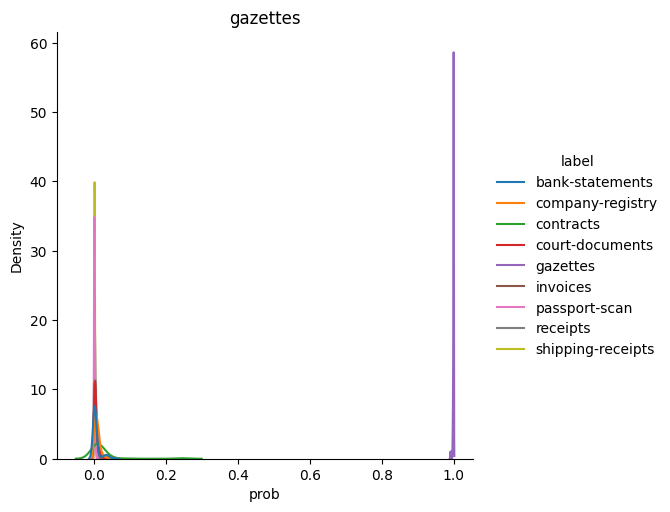

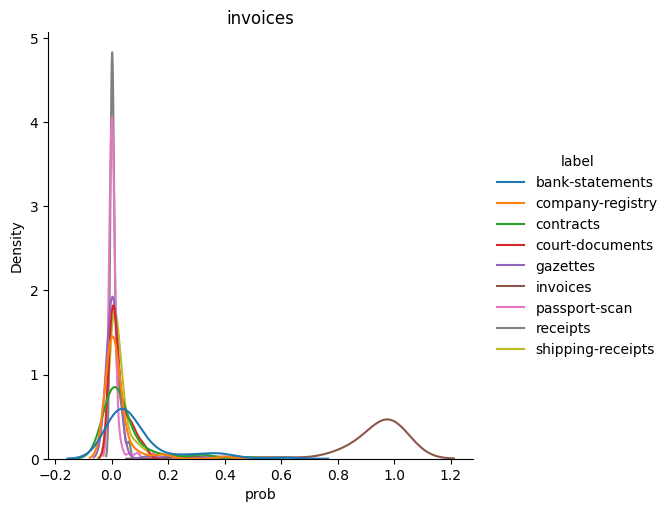

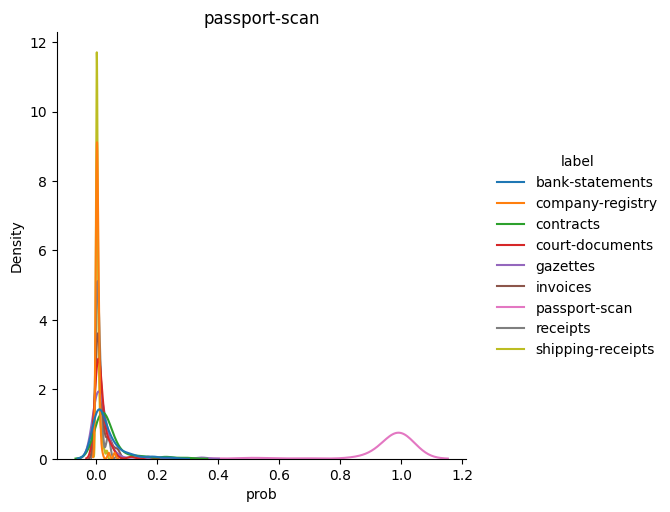

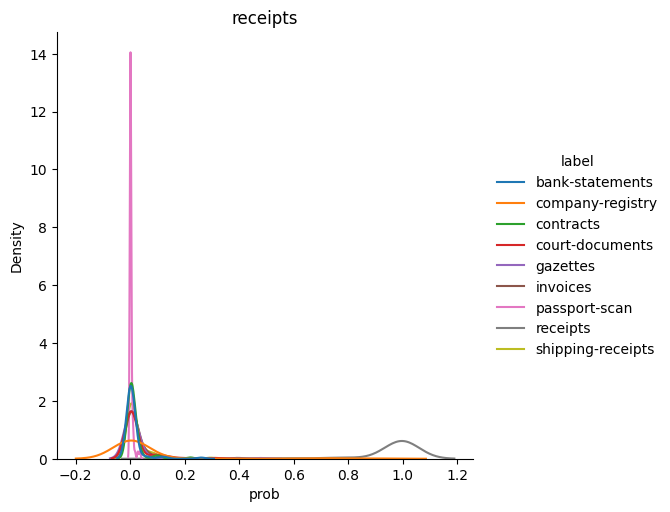

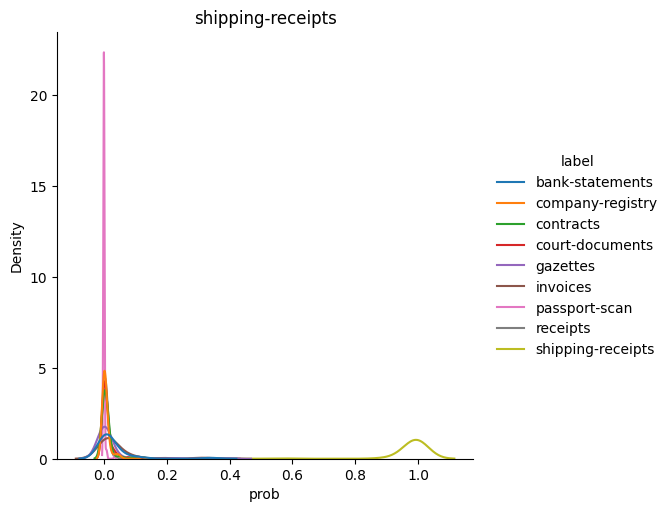

In [7]:
for col in df.columns[:-1]:
    df2 = df[df["true-label"] == col]
    df2 = df2[df2.columns[:-1]]
    df2 = df2.stack().reset_index()

    # sns.displot(, x="0", hue="level_1", kind="kde")
    df2.columns = ("index", "label", "prob")
    sns.displot(df2, x="prob", hue="label", kind="kde")
    plt.title(col)

In [8]:
for col in df.columns[:-1]:
    df2 = df[df["true-label"] == col]
    df2 = df2[df2.columns[:-1]]
    df2 = df2.stack().reset_index()

    # sns.displot(, x="0", hue="level_1", kind="kde")
    df2.columns = ("index", "label", "prob")
    df2["prob"] += 1e-10
    df2["prob"] = np.log(df2["prob"])
    sns.displot(df2, x="prob", hue="label", kind="kde")
    plt.title(col)

KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>

In [ ]:
for col in df.columns[:-1]:
    for col in df.columns[:-1]:
        sns.displot(df[df["true-label"] == col], x=col, kind="kde")

In [11]:
for col in df.columns[:-1]:
    px.histogram(df[df["true-label"] == col], x=col, title=col, nbins=50).show()